In [1]:
import requests
import time
from bs4 import BeautifulSoup
r = requests.get("https://nofluffjobs.com/pl/?criteria=jobPosition%3D%27data%20engineer%27&page=1")
soup = BeautifulSoup(r.text, 'html.parser')

#selector_oferty = "body > nfj-root > nfj-layout > nfj-main-content > div > nfj-postings-search > div > common-main-loader > nfj-search-results > nfj-postings-list > div.list-container.ng-star-inserted"



In [133]:
#Pobranie danych

job_list = ["data analyst", "data engineer", "data scientist"]

#Funkcja, która przyjmuje dwa parametry (nazwę stanowiska i numer strony), i zwraca kod HTML tej strony,
def get_html(job, page=1):
    
    re = requests.get(f"https://nofluffjobs.com/pl/?criteria=jobPosition%3D%27{job}%27&page={page}")
    print(re.url)
    soup = BeautifulSoup(re.text, 'html.parser')
    return soup
    
#Funkcja, która przyjmuje jeden parametr (kod strony) i zwraca informację czy strona zawiera ogłoszenia (True lub False)
def offer_exist(link):
    offer = requests.get(link)
    soup = BeautifulSoup(offer.text, 'html.parser')
    selector_oferty = "body > nfj-root > nfj-layout > nfj-main-content > div > nfj-postings-search > div > common-main-loader > nfj-search-results > nfj-postings-list > div.list-container.ng-star-inserted"
    if soup.select_one(selector_oferty):
        return True
    else:
        return False
#Funkcja, która przyjmuje jeden parametr (nazwę stanowiska), a następnie w pętli, zaczynając od 1 strony:
#Pobiera kod danej strony,
#Sprawdza, czy na stronie są jeszcze ogłoszenia,
#Jeżeli są, to zapisuje kod HTML na dysku i przechodzi do następnej strony,
#Jeżeli nie ma, to kończy działanie,

def save_as_html(job):
    page = 1
    while page < 100:
        soup = get_html(job, page)
        link = f"https://nofluffjobs.com/pl/?criteria=jobPosition%3D%27{job}%27&page={page}"
        #print(link)
        if offer_exist(link):
            with open(f"data/raw/{job}_{page}.html", encoding="utf-8", mode="w") as file:
                file.write(str(soup))
            print("page nr:", page)
            page += 1
        else:
            print("No_offers")
            break
        #Przerwa w czasie, aby ograniczyć liczbę requestów w czasie
        time.sleep(2)

In [134]:
for i in job_list:
    save_as_html(i)
#save_as_html("data%20analyst")

https://nofluffjobs.com/pl/?criteria=jobPosition%3D%27data%20analyst%27&page=1
page nr: 1
https://nofluffjobs.com/pl/?criteria=jobPosition%3D%27data%20analyst%27&page=2
page nr: 2
https://nofluffjobs.com/pl/?criteria=jobPosition%3D%27data%20analyst%27&page=3
No_offers
https://nofluffjobs.com/pl/?criteria=jobPosition%3D%27data%20engineer%27&page=1
page nr: 1
https://nofluffjobs.com/pl/?criteria=jobPosition%3D%27data%20engineer%27&page=2
page nr: 2
https://nofluffjobs.com/pl/?criteria=jobPosition%3D%27data%20engineer%27&page=3
page nr: 3
https://nofluffjobs.com/pl/?criteria=jobPosition%3D%27data%20engineer%27&page=4
No_offers
https://nofluffjobs.com/pl/?criteria=jobPosition%3D%27data%20scientist%27&page=1
page nr: 1
https://nofluffjobs.com/pl/?criteria=jobPosition%3D%27data%20scientist%27&page=2
No_offers


In [277]:
#Scrapowanie danych:
#lokalizacja - zarówno miasto, jak i państwo. W przypadku pracy zdalnej jako miasto ustawiono Zdalna, a jako państwo N/A,
#wynagrodzenie - zarówno dolna, jak i górna granica oraz waluta. Jeśli nie ma widełek, to w obu polach wpisywana jest ta sama wartość (dolna granica = górnej granicy),
#nazwa stanowiska,
#firma,
#technologia.

import html
jobs_in_file = []
result = {
    'name': 'nazwa stanowiska',
    'company': 'firma',
    'technology': 'technologia',
    'job': 'informacja o nazwie wyszukania np. data analyst ',
    'location': {'city': 'miasto', 'country': 'panstwo'},
    'salary': {'low': 'dolna granica', 'high': 'gorna granica', 'currency': 'waluta'} 
}



with open(f"data/raw/{job}_{page}.html", mode="r", encoding="utf-8") as file:

    tresc = file.read()
    
oferty_selector = 'body > nfj-root > nfj-layout > nfj-main-content > div > nfj-postings-search > div > common-main-loader > nfj-search-results > nfj-postings-list > div.list-container.ng-star-inserted > a'
soup = BeautifulSoup(tresc)
selector = "#nfjPostingListItem-ZMFRU03Q > nfj-posting-item-title > div > div > h3"
selector_placa = "a > div.posting-info.position-relative.md\:tw-flex.tw-grow.tw-items-center.ng-star-inserted > nfj-posting-item-tags > span"
klasa_stanowisko = "posting-title__position text-truncate color-main ng-star-inserted"
klasa_firma = "d-block posting-title__company text-truncate"
klasa_technologia = "tw-btn tw-btn-secondary-outline tw-btn-xs tw-uppercase ng-star-inserted"
klasa_lokalizacja = "tw-text-ellipsis tw-inline-block tw-overflow-hidden tw-whitespace-nowrap lg:tw-max-w-[100px] tw-text-right"
selector_technologia = "a > div.posting-info.position-relative.md\:tw-flex.tw-grow.tw-items-center.ng-star-inserted > nfj-posting-item-tags > common-posting-item-tag > object > a"

lista_ofert = soup.select(oferty_selector)

#Wydobywanie technologii:
def get_technologia(oferta):
    technologia = oferta.select("a > div.posting-info.position-relative.md\:tw-flex.tw-grow.tw-items-center.ng-star-inserted > nfj-posting-item-tags > common-posting-item-tag > object > a")
    
    if technologia:
        return technologia[0].text.strip()
    else:
        None
#Wydobywanie płacy:
def salary(job_nr):
    selector_placa = "a > div.posting-info.position-relative.md\:tw-flex.tw-grow.tw-items-center.ng-star-inserted > nfj-posting-item-tags > span"
    placa = soup.select(selector_placa)[job_nr].text
    n_placa = placa.replace(' ', '')
    n_placa = n_placa.replace("\xa0", '')
    n_placa = n_placa.strip()
    currency = n_placa[-3:]
    if "–" in n_placa:
        n_placa_low, n_placa_high = n_placa.split("–")
        n_placa_high = n_placa_high[:-3]
    else:
        n_placa_low = n_placa_high = n_placa[:-3]
    return {'low': n_placa_low, 'high': n_placa_high, 'currency': currency}

def jobs_from_file(job, page):
    with open(f"data/raw/{job}_{page}.html", mode="r", encoding="utf-8") as file:

        tresc = file.read()
    soup = BeautifulSoup(tresc)
    
    oferty_selector = 'body > nfj-root > nfj-layout > nfj-main-content > div > nfj-postings-search > div > common-main-loader > nfj-search-results > nfj-postings-list > div.list-container.ng-star-inserted > a'
    klasa_stanowisko = "posting-title__position text-truncate color-main ng-star-inserted"
    klasa_firma = "d-block posting-title__company text-truncate"
    klasa_lokalizacja = "tw-text-ellipsis tw-inline-block tw-overflow-hidden tw-whitespace-nowrap lg:tw-max-w-[100px] tw-text-right"
    
    lista_ofert = soup.select(oferty_selector)

    for each in range (0, len(lista_ofert)):
        tech = get_technologia(lista_ofert[each])
        result = {
        'name': soup.find_all(class_=klasa_stanowisko)[each].text.strip(),
        'company': soup.find_all(class_=klasa_firma)[each].text,
        'technology': tech,
        'job': job,
        'location': soup.find_all(class_=klasa_lokalizacja)[each].text.strip(),
        'salary': salary(each) 
    }
        jobs_in_file.append(result)
        print(result["name"])
        salary(each)



In [278]:
#Zebranie wszystkich rekordów z plików
job_list = ["data analyst", "data engineer", "data scientist"]
pages = [1, 2, 3]
jobs_in_file = []

for each in job_list:
    for i in pages:
        try:
            jobs_from_file(each, i)
        except:
            pass
# Sprawdzenie zawartości:
#jobs_in_file

Data Analyst
Content Manager
Junior Data Analyst
Senior Financial Systems Analyst
Business/Data Analyst
Data Scientist
Senior Data Analyst
Inżynier ds. analiz danych
Data Analyst
Graph Analytics and MLOps Lead
Creative Project Manager
Master Data Analyst (SAP)
Data Analyst with Power BI
Web3 Data Scientist / Engineer
Financial Systems Analyst
Business Coordinator
Technical Product Manager
Database administrator
Data Engineer - Scala Developer
Remote Senior Data Engineer II
Mid/Senior Data Engineer
Data Engineer
Azure Data Platform Engineer
Data Engineer
Junior Data Engineer
Senior RPA Developer
Software Engineer - Data Platform
Data Engineer
Remote Senior Data Engineer (AWS)
Data Engineer (with AWS)
Data Scientist Lead
Solution Architect / Data Engineering
👉Data Engineer
ETL / Data Engineer - Remote/ Wrocław
Remote Data Engineer/BI Developer
Data Engineer
Data Engineer/Analyst
GCP Data Engineer
Pre-Sales & Technical Sales (Cloud&Data)
Remote Data Engineer
Senior Staff Data Engineer
Sen

In [279]:
# Sprawdzenie długości listy
len(jobs_in_file)

64

In [280]:
#Zapis do datasetu
import datetime
import pandas

dzisiaj = datetime.date.today()
df = pandas.json_normalize(jobs_in_file, sep=";")
df.to_csv(f"data/interim/job_offers_{dzisiaj}.csv", index=False, encoding='utf-8')

In [331]:
#Transformacja danych
import pandas as pd
df = pd.read_csv(
                    r'data/interim/job_offers_2023-05-05.csv',
                    sep=',', # separator uzywany do wydzielenia kolumn
                    encoding='UTF-8',
                    decimal='.')

In [332]:
df.head(10)

,name,company,technology,job,location,salary;low,salary;high,salary;currency
0,Data Analyst,Miratech,NaN,data analyst,Zdalnie,4000,8000,PLN
1,Content Manager,Pravna Group,NaN,data analyst,Poznań,20160,25200,PLN
2,Junior Data Analyst,ALTEN Polska,NaN,data analyst,Gdańsk,18200,22300,PLN
3,Senior Financial Systems Analyst,Talentuno,NaN,data analyst,Kraków,30240,37800,PLN
4,Business/Data Analyst,Proxet,SQL,data analyst,Wroclaw,30240,38640,PLN
5,Data Scientist,Sopra Steria - Apps Services,Python,data analyst,Zdalnie,25000,35000,PLN
6,Senior Data Analyst,Divante S.A.,SQL,data analyst,Zdalnie,10000,12000,PLN
7,Inżynier ds. analiz danych,Sieć Badawcza Łukasiewicz – Instytut Lotnictwa,NaN,data analyst,Warszawa,18000,24000,PLN
8,Data Analyst,SEB (Skandinaviska Enskilda Banken),Python,data analyst,Warszawa,20000,28500,PLN
9,Graph Analytics and MLOps Lead,SEB (Skandinaviska Enskilda Banken),NaN,data analyst,Warszawa,16940,21780,PLN


In [333]:
#1 Usunięcie ofert, które nie mają kwoty podanej w PLN,
df.loc[df["salary;currency"] != "PLN"]

,name,company,technology,job,location,salary;low,salary;high,salary;currency


In [334]:
#2 Nazwy ofert pracy oraz miasta (kolumny name oraz location_city) zmieniono by były z małych liter

df['name'] = df['name'].str.lower()
df['location'] = df['location'].str.lower()

In [335]:
#3 Dodanie nowej kolumny salary_avg jako średnia z kolumn salary_high, salary_low
df["salary;avg"] = (df["salary;low"] + df["salary;high"]) / 2

In [336]:
#4 Zunifikowanie nazw miast:
df.loc[df["location"] == "warsaw", "location"] = "warszawa"
df.loc[df["location"] == "wroclaw", "location"] = "wrocław"
df["location"].unique()

array(['zdalnie', 'poznań', 'gdańsk', 'kraków', 'wrocław', 'warszawa',
       'budapest'], dtype=object)

In [337]:
#7 Wyselekcjonowanie ofert dla seniorów: Dodanie nowej kolumny is_senior,
df["is_senior"] = 0



In [320]:
for row in range (0, len(df["is_senior"])):
    if df["is_senior"][row] == 1:
        print(row)

3
6
19


In [366]:
for i in range (0, len(df["is_senior"])):
        if "senior" in df["name"].loc[i]:
            df.at[i, 'is_senior'] = 1



In [365]:
#Modyfikowanie konkretnej komórki:
df.at[3, 'is_senior'] = 1

In [339]:
#8 Zapis wyników do katalogu data\processed\ używając separatora ;, kodowania UTF-8 oraz bez indeksu (index=False). 
#Nazwa pliku - job_offers_yyyy_mm_dd.csv.

dzisiaj = datetime.date.today()
df.to_csv(f"data/processed/job_offers_{dzisiaj}.csv", sep=";", index=False, encoding='utf-8')

In [230]:
# Rozpoczęcie analizy danych

import pandas as pd

dzisiaj = "2023-05-05"
df = pd.read_csv(f"data/processed/job_offers_{dzisiaj}.csv", sep=';', decimal='.', encoding='utf-8')

In [232]:
df.groupby("job").head()

,name,company,technology,job,location,salary;low,salary;high,salary;currency,salary;avg,is_senior
0,data analyst,Miratech,NaN,data analyst,zdalnie,4000,8000,PLN,6000.0,0
1,content manager,Pravna Group,NaN,data analyst,poznań,20160,25200,PLN,22680.0,0
2,junior data analyst,ALTEN Polska,NaN,data analyst,gdańsk,18200,22300,PLN,20250.0,0
3,senior financial systems analyst,Talentuno,NaN,data analyst,kraków,30240,37800,PLN,34020.0,0
4,business/data analyst,Proxet,SQL,data analyst,wrocław,30240,38640,PLN,34440.0,0
17,database administrator,Freysoft,SQL,data engineer,zdalnie,4000,8000,PLN,6000.0,0
18,data engineer - scala developer,Avenga,Scala,data engineer,zdalnie,20160,25200,PLN,22680.0,0
19,remote senior data engineer ii,Sunscrapers,Python,data engineer,zdalnie,18200,22300,PLN,20250.0,0
20,mid/senior data engineer,SquareOne,Python,data engineer,zdalnie,30240,37800,PLN,34020.0,0
21,data engineer,Capco Poland,Hadoop,data engineer,zdalnie,30240,38640,PLN,34440.0,0


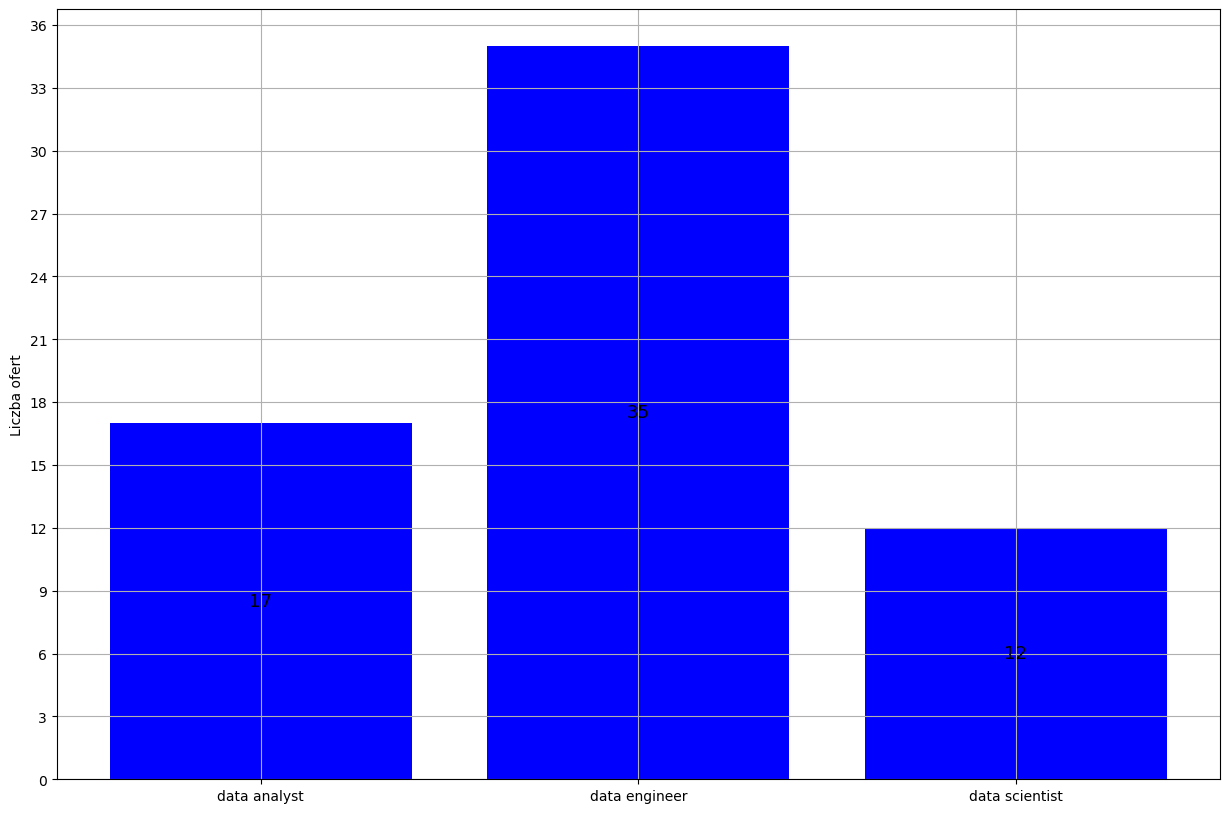

In [234]:
#Ile ofert pracy dla poszczególnego stanowiska zostało znalezione?
import matplotlib.pyplot as plt

test = df.loc[df["salary;avg"] > 5000]
diffrent_jobs = test.groupby("job").size()
job_names = ["data analyst", "data engineer", "data scientist"]
plt.figure(figsize=(15,10))
 
plt.bar(range(1, 4),
        diffrent_jobs,
        color='blue',
        label="Poszczególne zawody")

plt.xticks(range(1, 4), job_names)
plt.yticks(range(0, 37, 3))
plt.ylabel('Liczba ofert')

for i in range(0, 3):
    plt.text(i+1, diffrent_jobs.iloc[i] / 2
             , f"{diffrent_jobs.iloc[i]}"
             , ha = 'center', va = 'center', fontsize = 13)
plt.grid()
plt.legend()

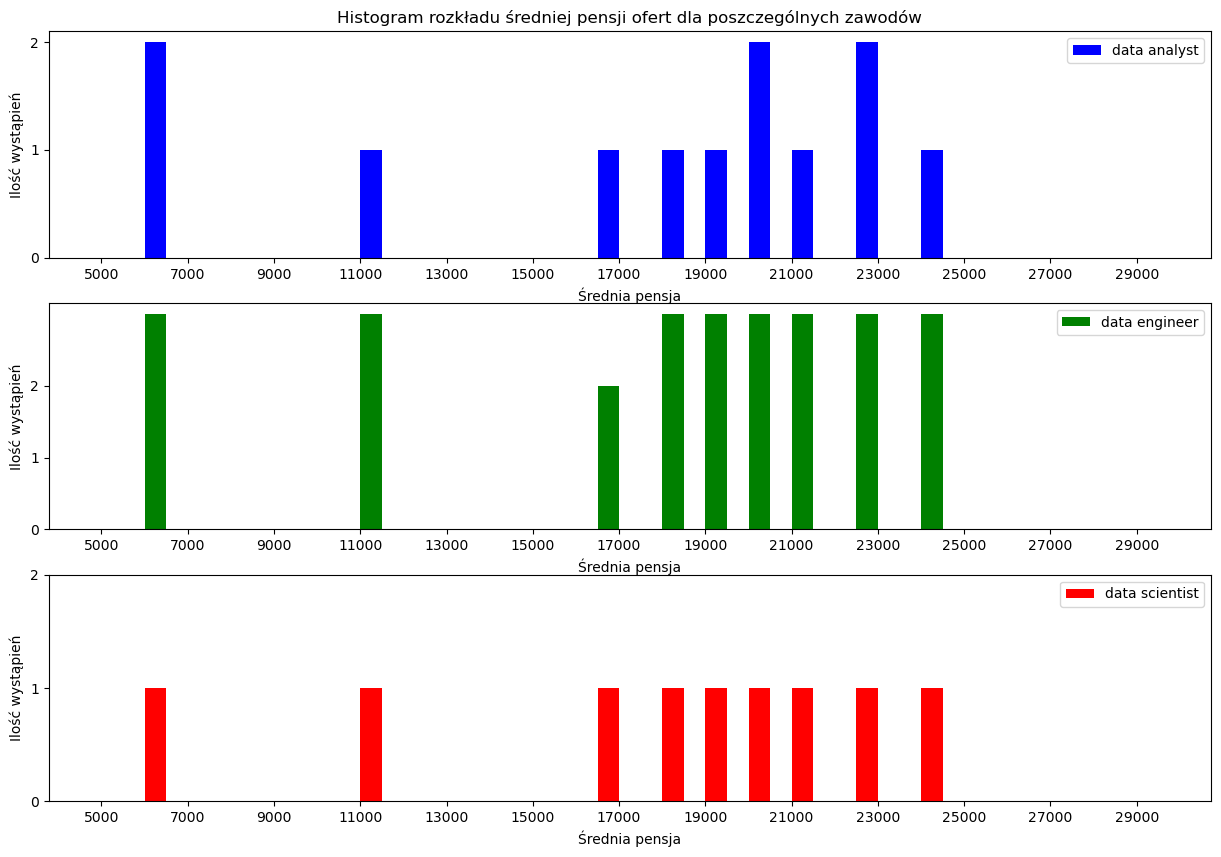

In [235]:
#Jak kształtują się średnie zarobki dla poszczególnych zawodów?
df1 = df.loc[df["job"] == "data analyst"]
df2 = df.loc[df["job"] == "data engineer"]
df3 = df.loc[df["job"] == "data scientist"]


plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
x1 = plt.hist(df1["salary;avg"],bins=range(5000,30000,500), color='blue', label=df1["job"])
#x2 = plt.hist(df2["salary;avg"],bins=range(5000,30000,500))
#x3 = plt.hist(df3["salary;avg"],bins=range(5000,30000,500))
plt.ylabel('Ilość wystąpień')
plt.xlabel('Średnia pensja')
plt.xticks(range(5000,30000, 2000)) #, rotation=45)
plt.yticks(range(0, 3, 1))
plt.title('Histogram rozkładu średniej pensji ofert dla poszczególnych zawodów')
plt.legend()

plt.subplot(3,1,2)

x2 = plt.hist(df2["salary;avg"],bins=range(5000,30000,500), color='green', label=df2["job"])
#x3 = plt.hist(df3["salary;avg"],bins=range(5000,30000,500), color='red')
plt.ylabel('Ilość wystąpień')
plt.xlabel('Średnia pensja')
plt.xticks(range(5000,30000, 2000)) #, rotation=45)
plt.yticks(range(0, 3, 1))
plt.legend()
#plt.title('Histogram rozkładu średniej pensji ofert dla poszczególnych zawodów')

plt.subplot(3,1,3)

x3 = plt.hist(df3["salary;avg"],bins=range(5000,30000,500), color='red', label=df3["job"])
plt.ylabel('Ilość wystąpień')
plt.xlabel('Średnia pensja')
plt.xticks(range(5000,30000, 2000)) #, rotation=45)
plt.yticks(range(0, 3, 1))
plt.legend()

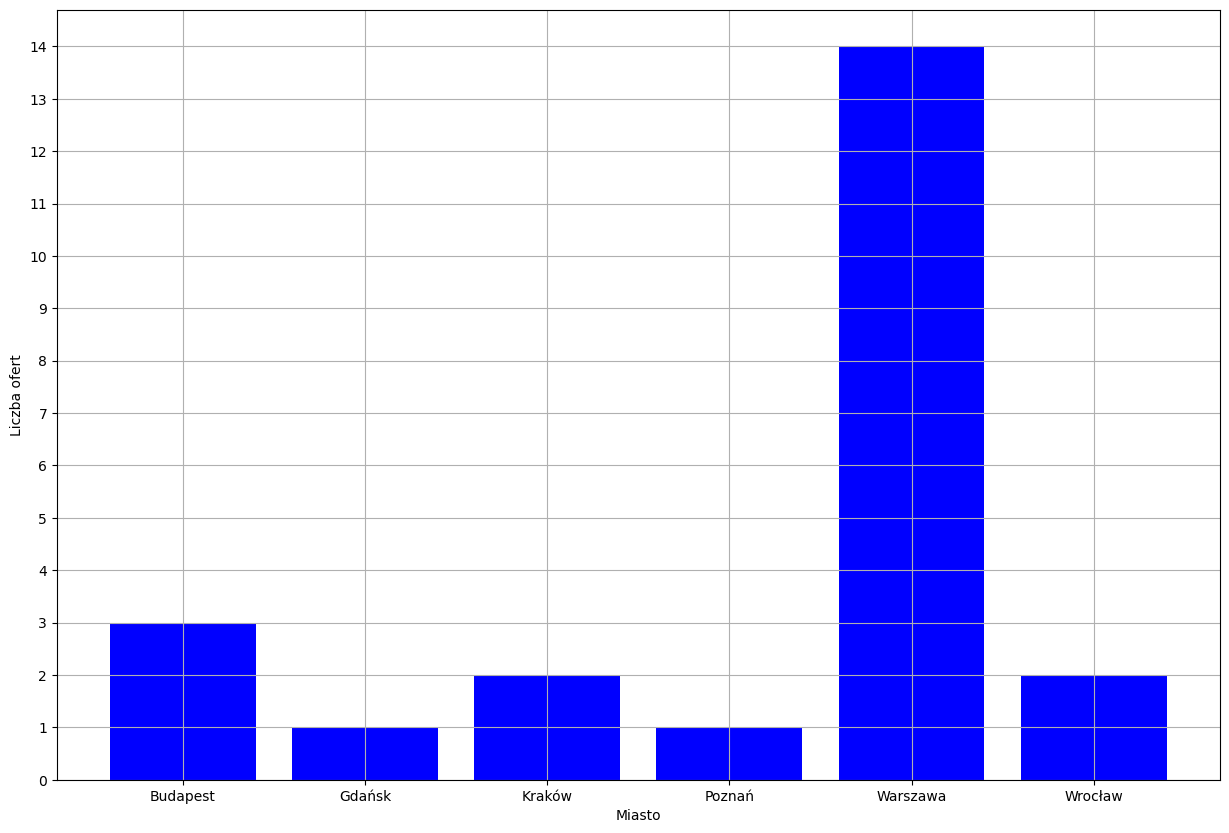

In [94]:
#W którym mieście jest najwięcej ofert pracy?
miasta = df.loc[df["location"] != "zdalnie"]
diffrent_cities = miasta.groupby("location").size()
cities = ["Budapest",
"Gdańsk",
"Kraków",
"Poznań",
"Warszawa",
"Wrocław"]

plt.figure(figsize=(15,10))
 
plt.bar(range(1, 7),
        diffrent_cities,
        color='blue',
        label="Poszczególne zawody")

plt.xticks(range(1, 7), cities) #, rotation=45)
plt.yticks(range(0, 15, 1))
plt.xlabel('Miasto')
plt.ylabel('Liczba ofert')


plt.grid()

In [121]:
#Gdzie jest oferowana najwyższa stawka?

df.loc[df["salary;high"] == df["salary;high"].max()]

,name,company,technology,job,location,salary;low,salary;high,salary;currency,salary;avg,is_senior
4,business/data analyst,Proxet,SQL,data analyst,wrocław,30240,38640,PLN,34440.0,0
16,technical product manager,"Secret Sauce Partners, Inc.",NaN,data analyst,zdalnie,30240,38640,PLN,34440.0,0
21,data engineer,Capco Poland,Hadoop,data engineer,zdalnie,30240,38640,PLN,34440.0,0
33,etl / data engineer - remote/ wrocław,Sofomo,SQL,data engineer,zdalnie,30240,38640,PLN,34440.0,0
45,cloud data engineer,hubQuest,Python,data engineer,zdalnie,30240,38640,PLN,34440.0,0
56,data scientist lead,Objectivity,Python,data scientist,zdalnie,30240,38640,PLN,34440.0,0


In [248]:
#Jaka jest różnica pomiędzy ofertą dla regular'a a seniora? - is senior wszędzie zmieniło na 0, więc zrobiłem 
#wykres różnic płacy dla poszczególnych zawodów

df_engineer = df.loc[df["job"] == "data scientist"]

lista = []
job_list = ["data analyst", "data engineer", "data scientist"]
for each in job_list:
    current_list = []
    df_current = df.loc[df["job"] == each]
    for i in range (0, 1000):
        try:
            current_list.append(df_current["salary;avg"][i])
        except:
            pass
            
        #print(current_list)
    lista.append(current_list)
    

analyst = lista[0]
engineer = lista[1]
scientist = lista[2]

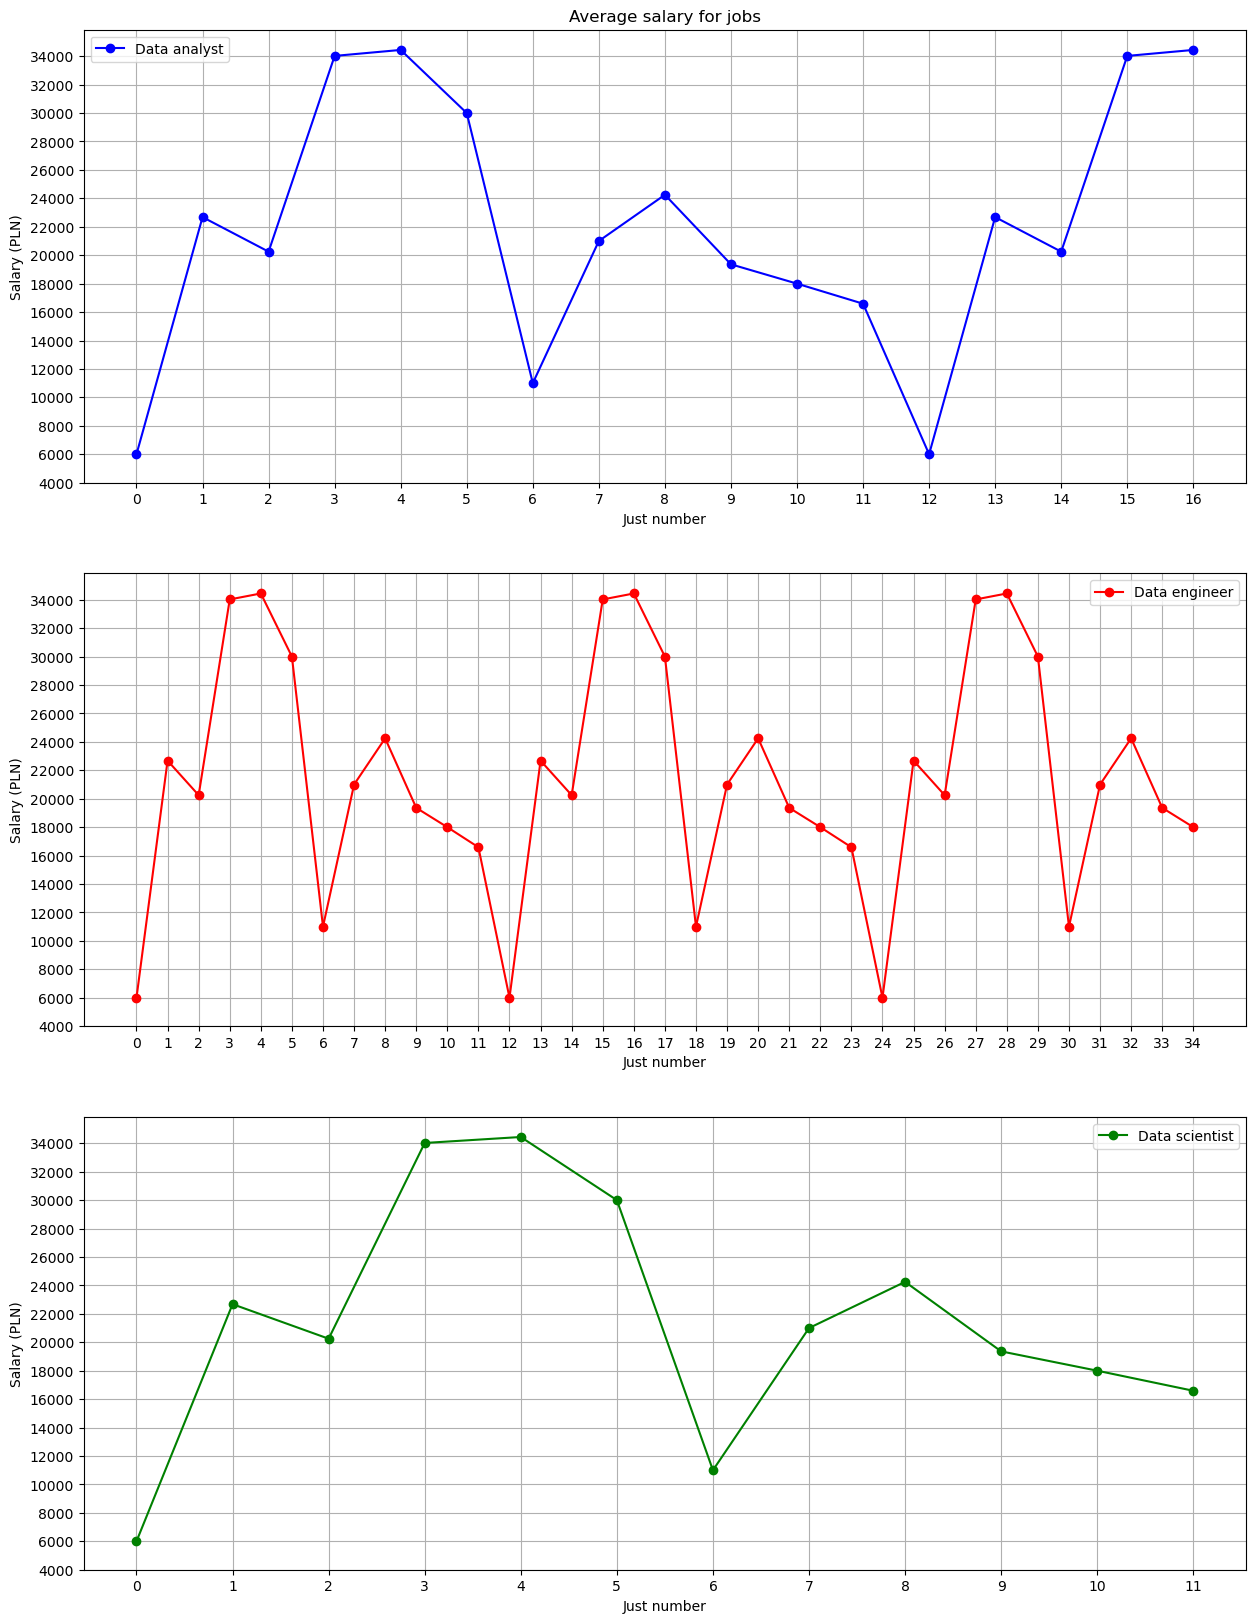

In [288]:
plt.figure(figsize=(15,20))
plt.subplot(3,1,1)

x1 = plt.plot(range (0, len(analyst)), analyst, "-o", color="blue", label='Data analyst' ) 
#x2 = plt.plot(range (0, len(engineer)), engineer, "-o", color="red", label='Data engineer' )
#x3 = plt.plot(range (0, len(scientist)), scientist, "-o", color="green", label='Data scientist' )

plt.ylabel('Salary (PLN)')
plt.xlabel('Just number')
plt.xticks(range(0, len(analyst), 1)) 
plt.yticks(range(4000, 35000, 2000))
#plt.title("Average salary for data analyst")
plt.grid()
plt.legend()
plt.title('Average salary for jobs')

plt.subplot(3,1,2)

#x1 = plt.plot(range (0, len(analyst)), analyst, "-o", color="blue", label='Data analyst' ) 
x2 = plt.plot(range (0, len(engineer)), engineer, "-o", color="red", label='Data engineer' )
#x3 = plt.plot(range (0, len(scientist)), scientist, "-o", color="green", label='Data scientist' )

plt.ylabel('Salary (PLN)')
plt.xlabel('Just number')
plt.xticks(range(0, len(engineer), 1)) 
plt.yticks(range(4000, 35000, 2000))
#plt.title("Average salary for data engineer")
plt.grid()
plt.legend()



plt.subplot(3,1,3)

#x1 = plt.plot(range (0, len(analyst)), analyst, "-o", color="blue", label='Data analyst' ) 
#x2 = plt.plot(range (0, len(engineer)), engineer, "-o", color="red", label='Data engineer' )
x3 = plt.plot(range (0, len(scientist)), scientist, "-o", color="green", label='Data scientist' )

plt.ylabel('Salary (PLN)')
plt.xlabel('Just number')
plt.xticks(range(0, len(scientist), 1)) 
plt.yticks(range(4000, 35000, 2000))
#plt.title("Average salary for data scientist")
plt.grid()
plt.legend()
plt.show()

In [262]:
#Jaki jest najniższy możliwy koszt zatrudnienia zespołu złożonego z data analyst, data engineer oraz data scientist?
df1min = df1.loc[df["salary;low"] == df1["salary;low"].min()]
df2min = df2.loc[df["salary;low"] == df2["salary;low"].min()]
df3min = df3.loc[df["salary;low"] == df3["salary;low"].min()]

print(df1.loc[df["salary;low"] == df2["salary;low"].min()])
print(df2.loc[df["salary;low"] == df2["salary;low"].min()])
print(df3.loc[df["salary;low"] == df3["salary;low"].min()])

                          name        company technology           job  \
0                 data analyst      Miratech         NaN  data analyst   
12  data analyst with power bi   Volvo Group         SQL  data analyst   

   location  salary;low  salary;high salary;currency  salary;avg  is_senior  
0   zdalnie        4000         8000             PLN      6000.0          0  
12  zdalnie        4000         8000             PLN      6000.0          0  
                                  name                  company technology  \
17              database administrator                Freysoft         SQL   
29            data engineer (with aws)   Insight - Nexer Group         AWS   
41  senior/ expert cloud data engineer               Capgemini         AWS   

              job location  salary;low  salary;high salary;currency  \
17  data engineer  zdalnie        4000         8000             PLN   
29  data engineer  zdalnie        4000         8000             PLN   
41  data engineer

In [263]:
#Czy istnieje możliwość powołania zespołu w jednym mieście? Jeśli tak to gdzie by było najtaniej?
cities = ["budapest",
"gdańsk",
"kraków",
"poznań",
"warszawa",
"wrocław"]
cities_founded = []

for i in cities:
    print("Location:", i)
    cur_city = df.loc[df["location"] == i]
    counter_analyst = 0
    counter_scientist = 0
    counter_engineer = 0
    for l in range (0, 100):
        try:
            if (cur_city["job"][l] == "data analyst") and (counter_analyst == 0):
                print("data analyst found")
                counter_analyst = 1
            else:
                if (df["job"][l] == "data engineer") and (counter_engineer == 0):
                    print("data engineer found")
                    counter_engineer = 1
                else:
                    if (df["job"][l] == "data scientist") and (counter_scientist == 0):
                        print("data scientist found")
                        counter_scientist = 1
            if counter_analyst == counter_scientist == counter_engineer ==1:
                  cities_founded.append(i)
        except:
            pass

#Usunięcie duplikatów z listy miast z pełnymi zespołami:
cities_founded = list(dict.fromkeys(cities_founded))  

#Znalezienie najtańszego zespołu:
job_list = ["data analyst", "data engineer", "data scientist"]


for i in cities_founded:
    cur_city = df.loc[df["location"] == i]
    suma = 0
    for job in job_list:
        cur_city_job = cur_city.loc[cur_city["job"] == job]
        suma += cur_city_job["salary;low"].min()
    print(f"Łączny koszt wynajęcia całego zespołu w mieście: {i}", suma)

Location: budapest
data engineer found
Location: gdańsk
data analyst found
Location: kraków
data analyst found
Location: poznań
data analyst found
Location: warszawa
data analyst found
data engineer found
data scientist found
Location: wrocław
data analyst found
data engineer found
Łączny koszt wynajęcia całego zespołu w mieście: warszawa 37880
